In [1]:
import pandas as pd
import numpy as np
import scipy
import numpy
from sklearn.preprocessing import Imputer

In [2]:
testfile = '/home/prashant/Desktop/kaggle/titanic/all/test.csv'
testDf = pd.read_csv(testfile)

In [3]:
trainfile = '/home/prashant/Desktop/kaggle/titanic/all/train.csv'
trainDf =  pd.read_csv(trainfile)

In [4]:
genderfile = '/home/prashant/Desktop/kaggle/titanic/all/gender_submission.csv'
genderDf = pd.read_csv(genderfile)

In [5]:
trainDf.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
datasetHasNan =True

In [7]:
trainDf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
columns_test = ['Pclass', 'Sex' , 'Age', 'Fare' , 'Embarked']
survived = ['Survived']

In [9]:
X=trainDf[columns_test]
y = trainDf[survived]

In [10]:
X['Age']=X['Age'].fillna(X['Age'].median() )
X['Embarked'].replace({"":np.nan}, inplace=True)
X['Embarked']= X['Embarked'].fillna(X['Embarked'].mode().iloc[0])
X.count()

/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/prashant/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

Pclass      891
Sex         891
Age         891
Fare        891
Embarked    891
dtype: int64

In [11]:
X['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
s ={'male':0, 'female' :1}

In [13]:
X['Sex'] = X['Sex'].apply(lambda x : s[x])

/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
e ={'S':0, 'C' :1, 'Q' : 2}
X['Embarked'] = X['Embarked'].apply(lambda x : e[x] )

/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [17]:
from sklearn import svm

In [18]:
clf =svm.LinearSVC()

In [19]:
clf.fit(X_train, y_train)

/home/prashant/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
clf.score(X_test, y_test)

0.6949152542372882

In [21]:
trainDf[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


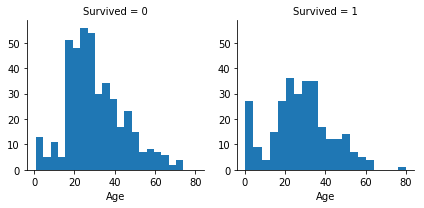

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(trainDf, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [23]:
trainDf['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
trainDf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
trainDf=trainDf.drop(['Cabin','Ticket'],axis=1)
testDf=testDf.drop(['Cabin','Ticket'],axis=1)

In [26]:
combine=[trainDf,testDf]

In [27]:
combine[1].shape

(418, 9)

In [28]:
for data in combine:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [29]:
pd.crosstab(trainDf['Title'],trainDf['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
for data in combine:
    data['Title']=data['Title'].replace(['Lady','Countess','Col','Capt','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    data['Title']=data['Title'].replace(['Ms','Mlle'],'Miss')
    data['Title']=data['Title'].replace('Mme','Mrs')
    

In [31]:
trainDf[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [32]:
titleMap={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

In [33]:
for data in combine:
    data['Title']=data['Title'].map(titleMap)
    data['Title']=data['Title'].fillna(0)

In [34]:
trainDf=trainDf.drop(['PassengerId','Name'],axis=1)

In [35]:
testDf=testDf.drop(['Name'],axis=1)

In [36]:
combine=[trainDf,testDf]

In [37]:
for data in combine:
    data['Sex']=data['Sex'].map({'male':0,'female':1}).astype(int)

In [41]:
guess_ages = np.zeros((2,3))
guess_ages
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)



In [51]:
trainDf['AgeBand'] = pd.cut( trainDf['Age'],5 )

In [53]:
trainDf[['AgeBand','Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [55]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [56]:
trainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [58]:
trainDf = trainDf.drop(['AgeBand'], axis=1)
combine = [trainDf, testDf]
trainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [59]:
for dataset in combine :
    dataset['FaimlySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    

In [63]:
trainDf[ ['FaimlySize' , 'Survived'] ].groupby( ['FaimlySize'], as_index = False ).mean().sort_values(by='FaimlySize', ascending=True)

,FaimlySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [64]:
for dataset in combine:
    dataset['isAlone'] = 0
    dataset.loc[ dataset['FaimlySize']==1, 'isAlone' ] =1

In [67]:
trainDf[ ['isAlone', 'Survived'] ].groupby('isAlone', as_index=True).mean().sort_values(by='isAlone', ascending=True)

,Survived
isAlone,
0,0.505650
1,0.303538


In [69]:
trainDf = trainDf.drop( ['Parch', 'SibSp', 'FaimlySize'], axis=1 )
testDf = testDf.drop( ['Parch', 'SibSp', 'FaimlySize'], axis=1 )

In [70]:
trainDf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [71]:
combine = [trainDf, testDf]

In [72]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset['Age']*dataset['Pclass']

In [73]:
testDf.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

/home/prashant/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Age*Class,Age,Pclass
0,NaN,2,3
1,NaN,2,3
2,NaN,3,2
3,NaN,1,3
4,NaN,1,3
5,NaN,0,3
6,NaN,1,3
7,NaN,1,2
8,NaN,1,3
9,NaN,1,3


In [74]:
freq = trainDf.Embarked.dropna().mode()[0]
freq

'S'

In [76]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq)

In [78]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S':0, 'C':1, 'Q':2 } )

In [84]:
testDf['Fare'].isna().count()

418

In [82]:
testDf.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [85]:
testDf['Fare'].fillna(testDf['Fare'].dropna().median(), inplace=True)
testDf.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Pclass
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [88]:
testDf.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'isAlone', 'Age*Pclass'],
      dtype='object')

In [86]:
X_train = trainDf.drop('Survived', axis=1)
Y_train = trainDf['Survived']

In [91]:
X_test = testDf.drop('PassengerId', axis=1).copy()


In [108]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.13

In [109]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, Y_train)
Y_pred=decisiontree.predict(X_test)
round(decisiontree.score(X_train, Y_train)*100, 2 )

93.94

In [111]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, Y_train)
Y_pred = randomforest.predict(X_test)
round( randomforest.score(X_train, Y_train)*100, 2 )

93.38

93.94